In [1]:
from sklearn.datasets import load_iris
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
X, y = load_iris(as_frame=True, return_X_y=True)

In [3]:
X_NaN = X.copy()
mask = np.random.uniform(0,1,size=X_NaN.shape)
mask = (mask <= 0.4)
X_NaN[mask] = np.NaN

In [4]:
iris_df_NaN = X_NaN.copy()
iris_df_NaN['species'] = y

In [5]:
is_NaN = iris_df_NaN.isna()

In [6]:
print(iris_df_NaN.isnull().sum() * 100 / len(iris_df_NaN))

sepal length (cm)    45.333333
sepal width (cm)     43.333333
petal length (cm)    37.333333
petal width (cm)     34.666667
species               0.000000
dtype: float64


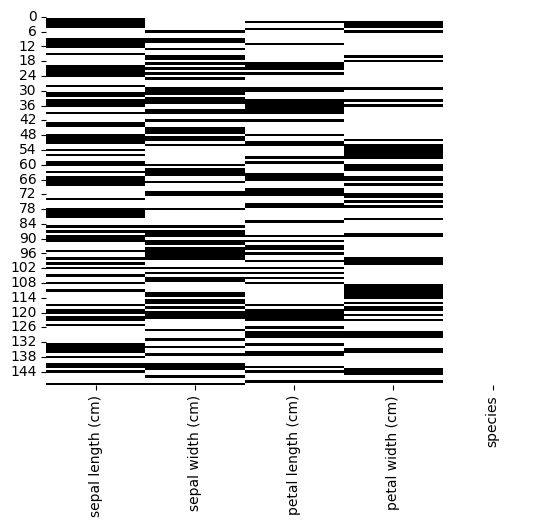

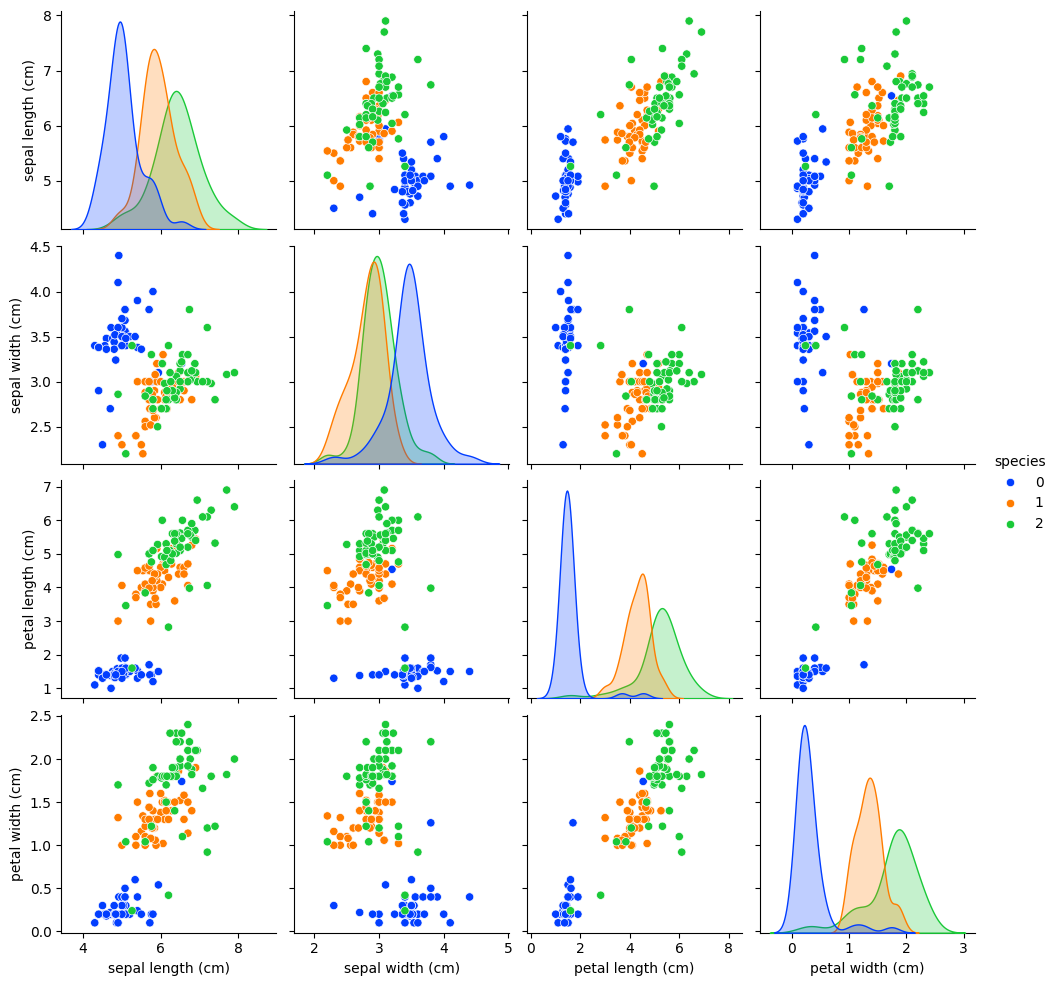

In [8]:
fig, ax = plt.subplots()
ax = sns.heatmap(is_NaN,
                cmap='gray_r',
                cbar=False)

knni = KNNImputer(n_neighbors=5)
X_NaN_kNN = knni.fit_transform(X_NaN)

iris_df_kNN = pd.DataFrame(X_NaN_kNN, columns=X_NaN.columns,
                          index=X_NaN.index)
iris_df_kNN['species'] = y
sns.pairplot(iris_df_kNN, hue='species', palette="bright")